In [ ]:
'data/DC_X_5_10_30_45_45_90_Y1_65_T1_20_T2_30_T3_0_I_200_DD_252_I2007_400_I2008_570/'

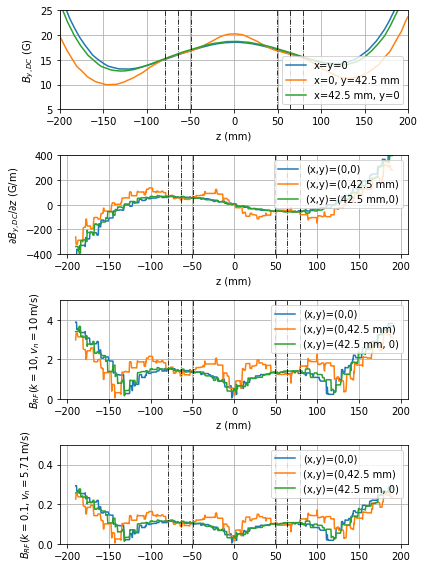

In [20]:
#!/usr/bin/env python
# coding: utf-8

# ## On-axis magentic field of a solenoid
# 
# https://phys.libretexts.org/Bookshelves/Electricity_and_Magnetism/Book%3A_Electricity_and_Magnetism_(Tatum)/06%3A_The_Magnetic_Effect_of_an_Electric_Current/6.08%3A_Field_on_the_Axis_of_a_Long_Solenoid
# 
# 
# $ B_z = \frac{1}{2} \mu_0 nI(\theta_1 - \cos \theta_2)$
# 

# ## Adiabaticity parameter
# 
# - $k = \frac{\gamma_n l B_1}{\pi v_n}$ 
# - $k = \frac{\gamma_n B_1^2}{ v_n(\partial B_0 /\partial z)}$ 
# 
# 


############# PREAMBLE ################

import sys
from os import path
import matplotlib
%matplotlib inline
# matplotlib.use('Agg')
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

############# PARAMETERS ################

#basedir = 'SF_Higuchi/211205_SF_loop/results/'
#analysisdir = 'SF_Higuchi/211205_SF_loop/analysis/'
basedir = 'data/'
analysisdir = 'analysis/'
#basedir = 'SF_Higuchi/211210_SF_1DC/results/'
#analysisdir = 'SF_Higuchi/211210_SF_1DC/analysis/'

# Lx, thetaz, I = sys.argv
# print(sys.argv)
#Xdc1e, Ly, Lx, tz, I = sys.argv[1:]


# model  =sys.argv[1]
model = 'DC_X_5_10_30_45_45_90_Y1_65_T1_20_T2_30_T3_0_I_300_DD_252_I2007_400_I2008_570'
subdir = basedir +  model + '/'

# N = 50
# l = 50e-3 # m
# # R = 98e-3/2
# R = 114e-3/2
# mu0 = 4*np.pi*1e-7 #N/A^2
# n = N/l
# I = 0.5

# def B_sol(r, z, nI, l):
#     cos1 = (z+l/2.)/np.sqrt((r-R)**2 + (z+l/2.)**2)
#     cos2 = (z-l/2.)/np.sqrt((r-R)**2 + (z-l/2.)**2)
#     return 1/2.*mu0*nI*(cos1 - cos2)


gamma_n = 2.9164e3 # Hz/G


def k(B1, d, v):
    return gamma_n*d*B1/(np.pi*v)/2
def k2(B1, dBdz, v):
    return gamma_n*(B1/2)**2/(v*dBdz)

def PSF(k):
    return 1- (np.sin(np.pi/2*np.sqrt(1+k**2)))**2/(1+k**2)                        

def Ck(dBdz, v):
    return np.abs(gamma_n/(v*dBdz))

zc = 64
lc = 30

if path.exists(subdir):

    ## Get dB/dz from the field map

    df_DC = pd.read_csv(subdir+'line_x.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)
    df_DC_y = pd.read_csv(subdir+'line_x_y4cm25.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)
    df_DC_z = pd.read_csv(subdir +'line_x_z4cm25.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)

    # df_DC = pd.read_csv('Takano_onlyDC/yoke_DC/line_x.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)
    # df_DC_y = pd.read_csv('Takano_onlyDC/yoke_DC/line_x_y4cm25.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)
    # df_DC_z = pd.read_csv('Takano_onlyDC/yoke_DC/line_x_z4cm25.table', names=['X','Y','Z','BX','BY','BZ','Phi'], sep='\s+', skiprows=9)

    fig0, ax0 = plt.subplots(4,1, figsize=(6,8))
    ax0[0].plot(df_DC['X']*10, df_DC['BY'], label='x=y=0')
    ax0[0].plot(df_DC_y['X']*10, df_DC_y['BY'], label='x=0, y=42.5 mm')
    ax0[0].plot(df_DC_z['X']*10, df_DC_z['BY'], label='x=42.5 mm, y=0')


    zlin = np.linspace(-19,19, 800)*1e-2
    z_DC = np.array(df_DC['X'])
    z_DC_av = (z_DC[1:]+z_DC[:-1])/2

    dBdz_DC = interp1d(z_DC_av, np.diff(df_DC['BY'])/(np.diff(df_DC['X'])[0]*1e-2), kind='cubic')
    dBdz_DC_y = interp1d(z_DC_av, np.diff(df_DC_y['BY'])/(np.diff(df_DC_y['X'])[0]*1e-2),kind='cubic')
    dBdz_DC_z = interp1d(z_DC_av, np.diff(df_DC_z['BY'])/(np.diff(df_DC_z['X'])[0]*1e-2), kind='cubic')


    ax0[1].plot(zlin*1e3, dBdz_DC(zlin*1e2), label='(x,y)=(0,0)')
    ax0[1].plot(zlin*1e3, dBdz_DC_y(zlin*1e2), label='(x,y)=(0,42.5 mm)')
    ax0[1].plot(zlin*1e3, dBdz_DC_z(zlin*1e2), label='(x,y)=(42.5 mm,0)')


    nI = 80
    # ax0[2].plot(zlin*1e3, np.abs(k2(B_sol(0, 0, nI, 100e-3)*1e4, dBdz_DC(zlin*1e2), 10)),label='(x,y)=(0,0)')
    # ax0[2].plot(zlin*1e3, np.abs(k2(B_sol(42.5e-3, 0, nI, 100e-3)*1e4, dBdz_DC_y(zlin*1e2), 10)),label='(x,y)=(0,42.5 mm)')
    # ax0[2].plot(zlin*1e3, np.abs(k2(B_sol(42.5e-3, 0, nI, 100e-3)*1e4, dBdz_DC_z(zlin*1e2), 10)),label='(x,y)=(42.5 mm,0)')
    # ax0[2].set_yscale('log')
    ax0[2].plot(zlin*1e3, np.sqrt(10/Ck(dBdz_DC(zlin*1e2), 10)),label='(x,y)=(0,0)')
    ax0[2].plot(zlin*1e3, np.sqrt(10/Ck(dBdz_DC_y(zlin*1e2), 10)),label='(x,y)=(0,42.5 mm)')
    ax0[2].plot(zlin*1e3, np.sqrt(10/Ck(dBdz_DC_z(zlin*1e2), 10)),label='(x,y)=(42.5 mm, 0)')
    # ax0[2].set_yscale('log')

    ax0[3].plot(zlin*1e3, np.sqrt(0.1/Ck(dBdz_DC(zlin*1e2), 5.71)),label='(x,y)=(0,0)')
    ax0[3].plot(zlin*1e3, np.sqrt(0.1/Ck(dBdz_DC_y(zlin*1e2), 5.71)),label='(x,y)=(0,42.5 mm)')
    ax0[3].plot(zlin*1e3, np.sqrt(0.1/Ck(dBdz_DC_z(zlin*1e2), 5.71)),label='(x,y)=(42.5 mm, 0)')



#     ax0[0].axvline(-290, ls='-',c='k',lw=.8)
#     ax0[0].axvline(290, ls='-',c='k',lw=.8)
#     ax0[0].axvline(100, ls='-.',c='k',lw=.8)
#     ax0[0].axvline(-100, ls='-.',c='k',lw=.8)
    for j in range(4):
        ax0[j].axvline(-zc-lc/2, ls='-.',c='k',lw=.8)
        ax0[j].axvline(-zc, ls='-.',c='k',lw=.8)
        ax0[j].axvline(-zc+lc/2, ls='-.',c='k',lw=.8)
        ax0[j].axvline(zc-lc/2, ls='-.',c='k',lw=.8)
        ax0[j].axvline(zc, ls='-.',c='k',lw=.8)
        ax0[j].axvline(zc+lc/2, ls='-.',c='k',lw=.8)

    ax0[0].set_xlabel('z (mm)')
    ax0[1].set_xlabel('z (mm)')
    ax0[2].set_xlabel('z (mm)')

    # ax0[1].set_yscale('log')
    ax0[0].grid()
    ax0[1].grid()
    ax0[2].grid()
    ax0[3].grid()

    ax0[0].legend(loc='lower right')
    ax0[1].legend(loc='upper right')
    ax0[2].legend(loc='upper right')
    ax0[3].legend(loc='upper right')


    ax0[0].set_xlim(-200,200)
    ax0[0].set_ylim(5,25)
#     ax0[0].set_ylim(30, 65)
    ax0[1].set_ylim(-400,400)
    ax0[2].set_ylim(0, 5)
    ax0[3].set_ylim(0, 0.5)

    ax0[0].set_ylabel('$B_{y,DC}$ (G)')
    ax0[1].set_ylabel('$\partial B_{y,DC}/\partial z$ (G/m)')
    # ax0[2].set_ylabel('$|k| =  \left| (\gamma_n B_1^2 ) /(v_n \\frac{\partial B_0 }{\partial z} ) \\right| $')
    ax0[2].set_ylabel('$B_{RF}(k=10, v_n=10 \,\mathsf{m/s})$')
    ax0[3].set_ylabel('$B_{RF}(k=0.1, v_n=5.71 \,\mathsf{m/s})$')
    fig0.tight_layout()
    fig0.savefig(analysisdir +'BDC_%s.png' %model)


    # def BDC_findmax(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DC0 = dBdz_DC(zlin0*1e2)
    #     dBdz_DC0_abs = np.abs(dBdz_DC0)
    #     idx = dBdz_DC0_abs.argmax(axis=0)
    #     return zlin0[idx], dBdz_DC0[idx]

    # def BDCy_findmax(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DCy0 = dBdz_DC_y(zlin0*1e2)
    #     dBdz_DCy0_abs = np.abs(dBdz_DCy0)
    #     idx = dBdz_DCy0_abs.argmax(axis=0)
    #     return zlin0[idx], dBdz_DCy0[idx]

    # def BDCz_findmax(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DCz0 = dBdz_DC_z(zlin0*1e2)
    #     dBdz_DCz0_abs = np.abs(dBdz_DCz0)
    #     idx = dBdz_DCz0_abs.argmax(axis=0)
    #     return zlin0[idx], dBdz_DCz0[idx]

    # def BDC_findmin(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DC0 = dBdz_DC(zlin0*1e2)
    #     dBdz_DC0_abs = np.abs(dBdz_DC0)
    #     idx = dBdz_DC0_abs.argmin(axis=0)
    #     return zlin0[idx], dBdz_DC0[idx]

    # def BDCy_findmin(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DCy0 = dBdz_DC_y(zlin0*1e2)
    #     dBdz_DCy0_abs = np.abs(dBdz_DCy0)
    #     idx = dBdz_DCy0_abs.argmin(axis=0)
    #     return zlin0[idx], dBdz_DCy0[idx]

    # def BDCz_findmin(z1, z2, N):
    #     zlin0 = np.linspace(z1,z2,N)
    #     dBdz_DCz0 = dBdz_DC_z(zlin0*1e2)
    #     dBdz_DCz0_abs = np.abs(dBdz_DCz0)
    #     idx = dBdz_DCz0_abs.argmin(axis=0)
    #     return zlin0[idx], dBdz_DCz0[idx]

